# Electricity Consumption Forecasting Using ARIMA

This example uses the ARIMA model to forecast electricity consumption using data from gov.ie. The time series ranges from 29th March 2011 to 17th February 2013.

#### Attributions

The below code uses the [pmdarima](https://github.com/alkaline-ml/pmdarima) library (Copyright (c) 2017 Taylor G Smith) in executing the below examples, as provided under the MIT License.

Modifications have been made where appropriate for conducting analysis on the dataset specific to this example.

The copyright and permission notices are made available below:

Copyright (c) 2017 Taylor G Smith

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

The dataset used in this example is sourced from [data.gov.ie](https://data.gov.ie/dataset/energy-consumption-gas-and-electricity-civic-offices-2009-2012/resource/6091c604-8c94-4b44-ac52-c1694e83d746).

The below work and findings are not endorsed by the original authors in any way.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts

# fix random seed for reproducibility
np.random.seed(7)

# load dataset
df = pd.read_csv('dccelectricitycivicsblocks34p20130221-1840.csv', engine='python', skipfooter=3)
df

,Civic Offices Blocks 3 and 4 KWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,13/02/2013,96,25,25,25.5,24.5,25,26,25.5,25.5,...,33,32.5,30.5,27.5,26,26,26,26,25.5,26.5
689,14/02/2013,96,26,25.5,26,25.5,25,27,25.5,26.5,...,31,30,30.5,29,28,26.5,25.5,25,25.5,25
690,15/02/2013,96,25.5,24.5,25.5,24.5,25,26.5,25,25.5,...,29,27,28,28,25.5,26,25.5,25.5,24.5,25
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24


In [2]:
df2=df.rename(columns=df.iloc[0])
df3=df2.drop(df.index[0])
df3
df3.drop(df3.index[0])
df4=df3.drop('Date', axis=1)
df5=df4.drop('Values', axis=1)
df5
df6=df5.dropna()
df7=df6.values
df7
dataset=np.sum(df7, axis=1, dtype=float)
dataset

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

In [3]:
df=pd.DataFrame(dataset)
df.to_csv("daily kilowatt consumption.csv")

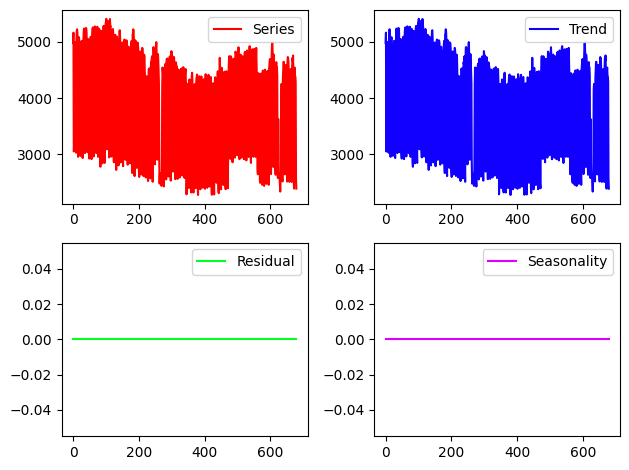

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(dataset, model='additive', period=1)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(dataset,color='#ff0000', label='Series')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,color='#1100ff', label='Trend')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(223)
plt.plot(residual,color='#00ff1a', label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(224)
plt.plot(seasonal,color='#de00ff', label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

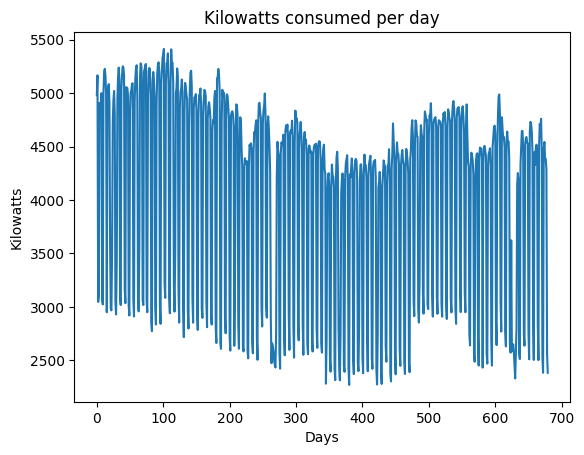

In [5]:
plt.plot(dataset)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Kilowatts consumed per day")
plt.show()

In [6]:
train_df=dataset[:554]
train_df

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

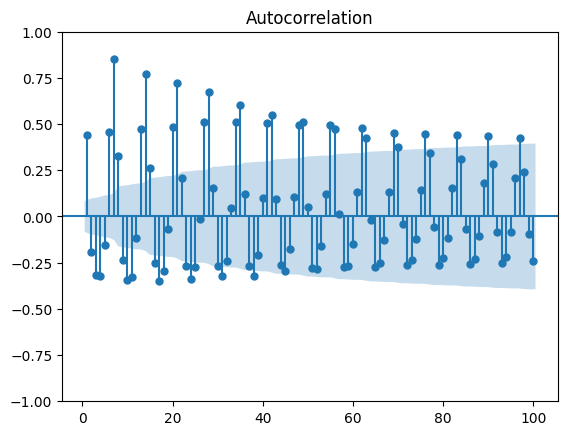

In [7]:
plot_acf(train_df, lags=100, zero=False);

/home/michael/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


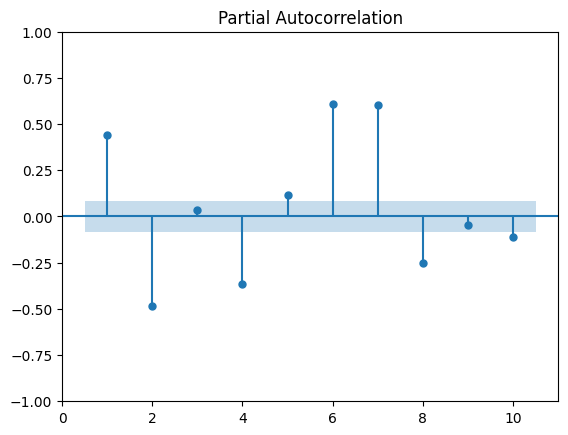

In [8]:
plot_pacf(train_df, lags=10, zero=False);

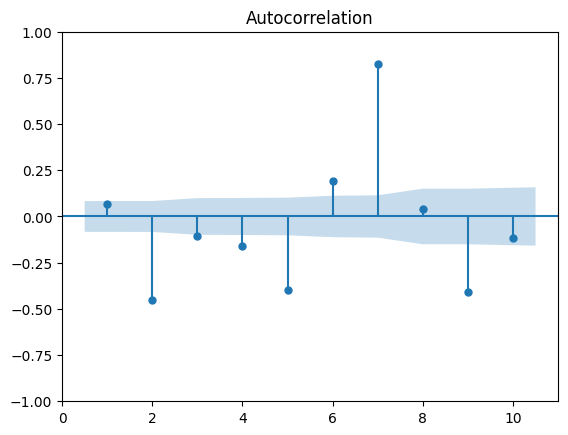

In [9]:
plot_acf(np.diff(train_df, 1), lags=10, zero=False);

In [10]:
test_df=dataset[554:693]

In [11]:
window_size = 7

numbers_series = pd.Series(train_df)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
ts7 = moving_averages_list[window_size - 1:]
ts7=np.array(ts7)
print(ts7)

[4423.95016863 4426.58588328 4127.91444996 4124.65730693 4396.58588136
 4438.11445782 4490.72159985 4527.51446069 4526.31445775 4508.35731098
 4774.11445863 4781.335889   4764.87874848 4720.20018032 4494.34302684
 4207.20015744 4209.60015842 4014.15015384 3966.42872428 3944.67872128
 3959.82871954 4133.8072943  4142.61444282 4137.19301604 4124.01444408
 4156.65015984 4188.53586798 4219.77872932 4266.87872752 4273.41444343
 4286.03586934 4517.25016077 4548.85730309 4562.55017281 4562.63588824
 4567.56446431 4579.09303531 4581.55732456 4583.57161442 4566.68590411
 4537.73589653 4499.50732123 4192.30731256 4156.56445257 4413.04303441
 4406.16445869 4402.65017155 4408.41445515 4425.64302173 4433.74301965
 4432.37159022 4445.74302211 4464.15017019 4493.52874484 4518.06446212
 4497.96446582 4499.01446778 4505.91446904 4307.50731386 4309.05016518
 4315.50016376 4315.28587505 4332.77158957 4330.62873243 4339.17873411
 4576.86445837 4588.15731976 4586.2287516  4588.20018196 4300.00731877
 4284.

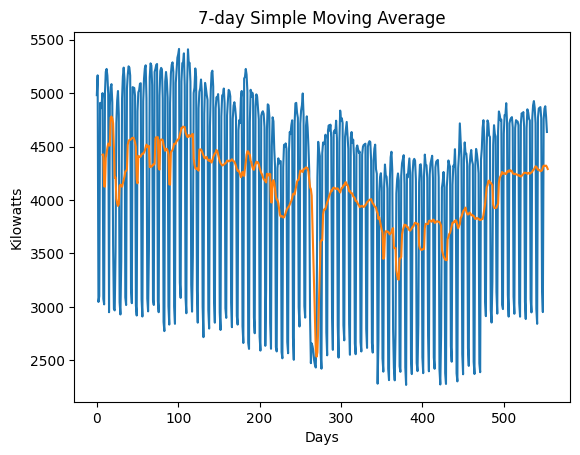

In [12]:
n1=math.nan
n7=np.array([n1,n1,n1,n1,n1,n1,n1])
ts7=np.concatenate([n7,ts7])
plt.plot(train_df)
plt.plot(ts7)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("7-day Simple Moving Average")
plt.show()

In [13]:
#Dickey-Fuller Test
result = ts.adfuller(train_df, 1)
result

(-20.938878465417247,
 0.0,
 1,
 552,
 {'1%': -3.4422521197633187,
  '5%': -2.866790184232015,
  '10%': -2.569566175304558},
 8875.183115493921)

In [14]:
Arima_model=pm.auto_arima(train_df, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=7, stepwise=True, seasonal=True, information_criterion='aic', trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=8483.714, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=8421.989, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=8319.248, Time=0.45 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=8360.091, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=1.37 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=8328.690, Time=0.34 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=8451.400, Time=0.20 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=inf, Time=0.79 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=8415.537, Time=0.11 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=8321.247, Time=1.22 sec

Best model:  ARIMA(0,1,1)(0,1,1)[7]          
Total fit time: 

In [15]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  554
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -4156.624
Date:                           Tue, 18 Apr 2023   AIC                           8319.248
Time:                                   02:19:18   BIC                           8332.155
Sample:                                        0   HQIC                          8324.293
                                           - 554                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8248      0.014    -58.414      0.000      -0.852      -0.797
ma.S.L7       -0.3203      0.025    -12.861      0.000      -0.369      -0.272
sigma2      2.382e+05   6398.373     37.235      0.000    2.26e+05    2.51e+05
===================================================================================
Ljung-Box (L1) (Q):                  31.03   Jarque-Bera (JB):              1698.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=126))
prediction=np.array(prediction)

In [17]:
prediction

array([[3107.73899415],
       [2911.60623857],
       [4743.59308753],
       [4842.81277124],
       [4861.33081675],
       [4789.39673305],
       [4659.94507311],
       [3098.28597129],
       [2902.1532157 ],
       [4734.14006467],
       [4833.35974838],
       [4851.87779389],
       [4779.94371019],
       [4650.49205025],
       [3088.83294842],
       [2892.70019283],
       [4724.6870418 ],
       [4823.90672551],
       [4842.42477102],
       [4770.49068732],
       [4641.03902738],
       [3079.37992556],
       [2883.24716997],
       [4715.23401894],
       [4814.45370265],
       [4832.97174815],
       [4761.03766445],
       [4631.58600452],
       [3069.92690269],
       [2873.7941471 ],
       [4705.78099607],
       [4805.00067978],
       [4823.51872529],
       [4751.58464159],
       [4622.13298165],
       [3060.47387983],
       [2864.34112424],
       [4696.32797321],
       [4795.54765692],
       [4814.06570242],
       [4742.13161872],
       [4612.679

In [18]:
prediction=prediction.reshape(126,-1)
prediction

array([[3107.73899415],
       [2911.60623857],
       [4743.59308753],
       [4842.81277124],
       [4861.33081675],
       [4789.39673305],
       [4659.94507311],
       [3098.28597129],
       [2902.1532157 ],
       [4734.14006467],
       [4833.35974838],
       [4851.87779389],
       [4779.94371019],
       [4650.49205025],
       [3088.83294842],
       [2892.70019283],
       [4724.6870418 ],
       [4823.90672551],
       [4842.42477102],
       [4770.49068732],
       [4641.03902738],
       [3079.37992556],
       [2883.24716997],
       [4715.23401894],
       [4814.45370265],
       [4832.97174815],
       [4761.03766445],
       [4631.58600452],
       [3069.92690269],
       [2873.7941471 ],
       [4705.78099607],
       [4805.00067978],
       [4823.51872529],
       [4751.58464159],
       [4622.13298165],
       [3060.47387983],
       [2864.34112424],
       [4696.32797321],
       [4795.54765692],
       [4814.06570242],
       [4742.13161872],
       [4612.679

In [19]:
len(prediction)

126

In [20]:
mse = mean_squared_error(test_df, prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1288.000420


In [21]:
np.mean(test_df)

3862.4563492063494

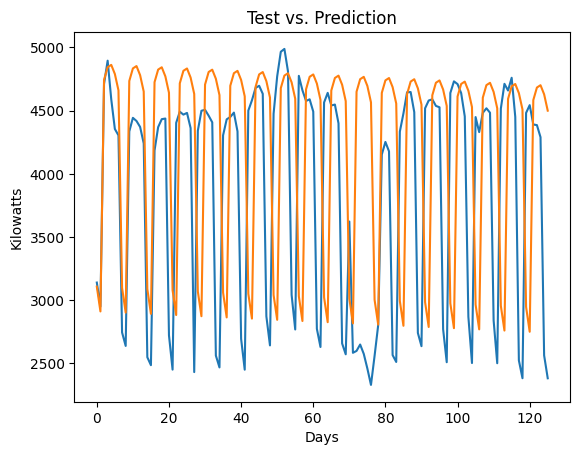

In [22]:
plt.plot(test_df)
plt.plot(prediction)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Test vs. Prediction")
plt.show()